# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
# seed값 설정
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

2.15.0


##### MNIST dataset Loading

In [2]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [4]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

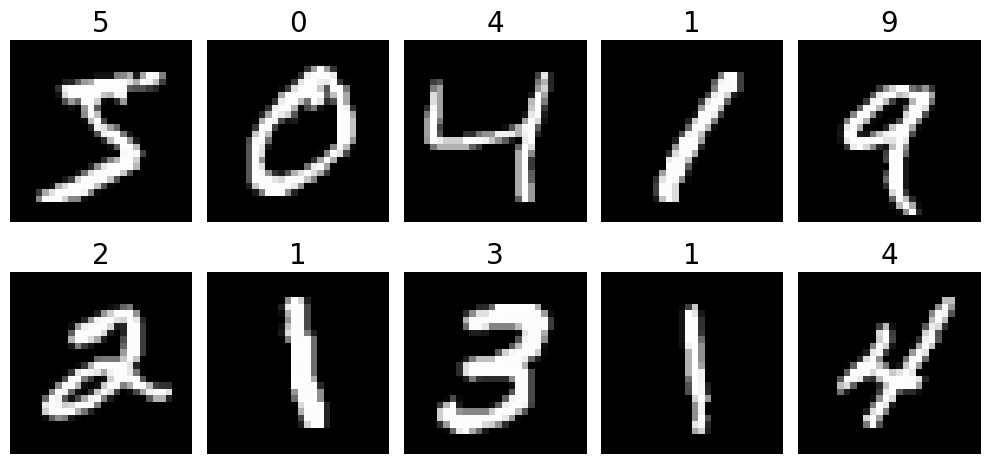

In [5]:
# X값-image 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f'{train_label[i]}', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
            - 딥러닝 모델이 각 Label별 확률을 출력하도록 정의 되기 때문에 y(정답)도 같은 형태로 만들어 줘야 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [6]:
train_image.min(), train_image.max(), train_image.dtype
# u_int8 = 2^8 = 256
# gray scale 명도 수치

0 255 uint8


In [ ]:
X_train = train_image.astype("float32")/255
X_test = test_image.astype('float32')/255

##### label(y)를 one hot encoding

In [8]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [9]:
y_train = keras.utils.to_categorical(train_label, num_classes=10)
y_test = keras.utils.to_categorical(test_label)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [10]:
train_label[:3]

array([5, 0, 4], dtype=uint8)

In [10]:
train_label[0]

5

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 네트워크(모델) 정의
- Network : 전체 모델 구조

### 모델 정의 방법 - Sequential API 이용
- Keras Sequential API는 모델을 구성하는 각 레이어에 하나의 입력 텐서와 하나의 출력 텐서가 있는 구조의 모델을 만들 때 사용한다.
- 모델 정의 뿐 아니라 모델을 구성하는 레이버 블록을 정의할 때 사용할 수 있다.

In [ ]:
# Sequential model 정의 1: 모델객체를 생성하고 add() 메소드를 이용해 순서대로 Layer 를 하나씩 추가.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=128,
                             activation="relu"))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dense(units=16, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))


In [ ]:
# Sequential Model 정의 2: 객체 생성시 Layer들을 순서대로 리스트로 묶어 전달.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dense(units=16, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax"),
])

### 모델 정의 방법 - Functional API 
- Keras Functional API는 Sequential API보다 다양한 구조의 모델을 생성할 수 있는 더 유연한 방법이다. 함수형 API는 다중 입력, 다중 출력 모델, 레이어 분기 및 병합등의 다양한  구조를 정의할 수 있다.



In [ ]:
inputs = keras.layers.Input(shape=(28, 28))
X = keras.layers.Flatten()(inputs)
X = keras.layers.Dense(units=128, activation="relu")(X)
X = keras.layers.Dense(units=64, activation="relu")(X)
X = keras.layers.Dense(units=32, activation="relu")(X)
X = keras.layers.Dense(units=16, activation="relu")(X)
outputs = keras.layers.Dense(units=10, activation="softmax")(X)

model = keras.models.Model(inputs=inputs, outputs=outputs)

In [55]:
# 모델의 구조를 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 10)                170   

In [ ]:
# !pip install graphviz pydot pydotplus

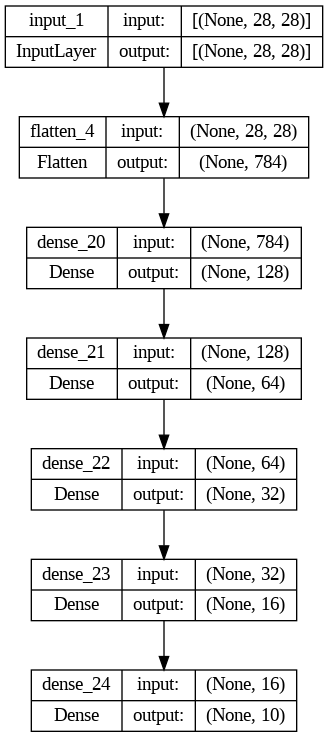

In [56]:
# graphviz를 이용한 모델구조를 시각화
keras.utils.plot_model(model,
                       show_shapes=True
                       , to_file='model_shapes.png'
                      )

## 컴파일
- 정의된 딥러닝 모델을 학습할 수 있는 상태로 만들어 주기 위해 다음을 추가적으로 설정 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [57]:
model.compile(loss="categorical_crossentropy", # 손실함수 설정.
              optimizer="adam",                # 최적화 함수(optimizer) 설정
              metrics=["accuracy"]
              )

## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 **History** 객체에 넣어 반환한다.
- **History**: train 시 에폭별 평가지표값들을 모아서 제공. 


In [58]:
history = model.fit(X_train,         # 학습 데이터
                    y_train,
                    batch_size=1000, # 몇개씩 끊어서 학습할 것인지.
                    epochs=10,       # 데이터셋을 몇번 학습할지 횟수.
                    validation_split=0.3 # 학습데이터의 30%를 검증용으로 써라.
                    )

Epoch 1/10
42/42 [==============================] - 2s 24ms/step - loss: 1.4360 - accuracy: 0.5059 - val_loss: 0.6408 - val_accuracy: 0.8504
Epoch 2/10
42/42 [==============================] - 1s 19ms/step - loss: 0.4296 - accuracy: 0.8834 - val_loss: 0.3221 - val_accuracy: 0.9076
Epoch 3/10
42/42 [==============================] - 1s 19ms/step - loss: 0.2863 - accuracy: 0.9195 - val_loss: 0.2559 - val_accuracy: 0.9267
Epoch 4/10
42/42 [==============================] - 1s 28ms/step - loss: 0.2241 - accuracy: 0.9369 - val_loss: 0.2113 - val_accuracy: 0.9397
Epoch 5/10
42/42 [==============================] - 1s 29ms/step - loss: 0.1855 - accuracy: 0.9475 - val_loss: 0.1882 - val_accuracy: 0.9462
Epoch 6/10
42/42 [==============================] - 1s 21ms/step - loss: 0.1543 - accuracy: 0.9560 - val_loss: 0.1674 - val_accuracy: 0.9503
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 0.1331 - accuracy: 0.9621 - val_loss: 0.1521 - val_accuracy: 0.9568
Epoch 8/10
42

##### 학습 과정 시각화

In [19]:
type(history)

keras.src.callbacks.History

In [20]:
print(type(history))
print("학습 에폭리스트: ", history.epoch)
print("에폭수, 에폭당 step수: ", history.params)

<class 'keras.src.callbacks.History'>
학습 에폭리스트:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
에폭수, 에폭당 step수:  {'verbose': 1, 'epochs': 10, 'steps': 42}


In [21]:
history.history

{'loss': [1.479690432548523,
  0.44290223717689514,
  0.27626147866249084,
  0.213568314909935,
  0.17530936002731323,
  0.14651918411254883,
  0.12446649372577667,
  0.1074243038892746,
  0.09352390468120575,
  0.0854981541633606],
 'accuracy': [0.5322142839431763,
  0.8816666603088379,
  0.9250476360321045,
  0.9420475959777832,
  0.9515237808227539,
  0.9591190218925476,
  0.9645476341247559,
  0.9703094959259033,
  0.9736904501914978,
  0.9758809804916382],
 'val_loss': [0.6225899457931519,
  0.31632089614868164,
  0.2522355020046234,
  0.20055074989795685,
  0.18992124497890472,
  0.16278740763664246,
  0.15584392845630646,
  0.14509984850883484,
  0.13760045170783997,
  0.1311035007238388],
 'val_accuracy': [0.8437777757644653,
  0.914222240447998,
  0.9284444451332092,
  0.9442777633666992,
  0.9465555548667908,
  0.9538888931274414,
  0.9557222127914429,
  0.9583333134651184,
  0.9600555300712585,
  0.9621666669845581]}

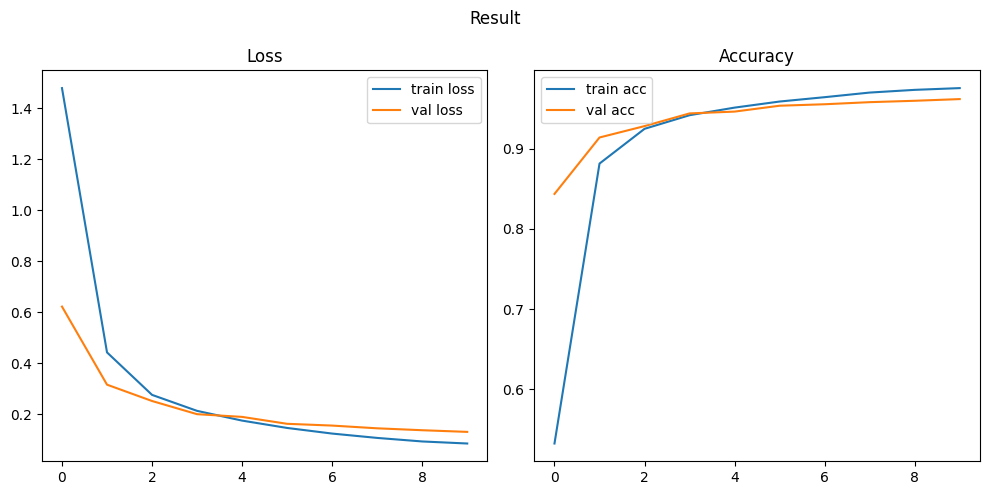

In [23]:
# 학습 에폭별 loss와 accuracy 변화량 시각화
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'malgun gothic'
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.suptitle('Result')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

## 테스트셋 평가

In [25]:
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1234 - accuracy: 0.9649


In [27]:
print(result)
print(f"testset 검증결과 - loss: {result[0]}, accuracy: {result[1]}")
# 검증결과: loss(오차) + compile시 지정한 metrics가 추가

[0.12340373545885086, 0.964900016784668]
testset 검증결과 - loss: 0.12340373545885086, accuracy: 0.964900016784668


## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기    
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [28]:
X_new = X_test[:3]  #추론할 데이터들
X_new.shape

(3, 28, 28)

In [29]:
X_new.min(), X_new.max()

(0.0, 1.0)

In [30]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
pred = model.predict(X_new)

1/1 [==============================] - 0s 99ms/step


In [24]:
print(pred.shape)
np.round(pred, 3)

(3, 10)


array([[0.   , 0.   , 0.   , 0.006, 0.   , 0.   , 0.   , 0.993, 0.   ,
        0.   ],
       [0.   , 0.   , 0.994, 0.003, 0.   , 0.003, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.989, 0.   , 0.   , 0.001, 0.002, 0.001, 0.005, 0.001,
        0.   ]], dtype=float32)

In [34]:
print(pred.shape)
np.round(pred[0], 3)

(3, 10)


array([0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.998, 0.   ,
       0.   ], dtype=float32)

In [35]:
np.argmax(pred, axis=1)

array([7, 2, 1])

In [41]:
np.argmax(y_test[:3], axis=-1)

array([7, 2, 1])

In [40]:
test_label[:3]

array([7, 2, 1], dtype=uint8)